In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('future_homes.csv')

In [2]:
print("--Dataset Info--")
print(df.info())

--Dataset Info--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction_ID  1020 non-null   object 
 1   Date_Sold       1020 non-null   object 
 2   Price           1020 non-null   float64
 3   Area_SqFt       1020 non-null   float64
 4   Lot_Frontage    977 non-null    float64
 5   Bedrooms        794 non-null    float64
 6   Location        1020 non-null   object 
 7   Condition       1020 non-null   object 
 8   Neighborhood    1020 non-null   object 
 9   Year_Built      1020 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.8+ KB
None


In [3]:
print(f"Duplicates before removal: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicates after removal: {df.duplicated().sum()}")

Duplicates before removal: 8
Duplicates after removal: 0


In [4]:
print(f"Unique Locations (Messy): {df['Location'].unique()}")
df['Location']= df['Location'].str.title()
print(f"Unique Locations (clean): {df['Location'].unique()}")

Unique Locations (Messy): ['Suburban' 'urban' 'Urban' 'Rural']
Unique Locations (clean): ['Suburban' 'Urban' 'Rural']


In [5]:
print("\n-- missing Values Count")
print(df.isnull().sum())


-- missing Values Count
Transaction_ID      0
Date_Sold           0
Price               0
Area_SqFt           0
Lot_Frontage       43
Bedrooms          224
Location            0
Condition           0
Neighborhood        0
Year_Built          0
dtype: int64


In [8]:
from sklearn.impute import SimpleImputer, KNNImputer
median_imputer = SimpleImputer(strategy='median')
df[['Lot_Frontage']] = median_imputer.fit_transform(df[['Lot_Frontage']])

In [9]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df[['Bedrooms']] = mode_imputer.fit_transform(df[['Bedrooms']])

In [10]:
df.head()

,Transaction_ID,Date_Sold,Price,Area_SqFt,Lot_Frontage,Bedrooms,Location,Condition,Neighborhood,Year_Built
0,TXN-0,23-07-2022,208638.230487,2059.742175,56.496435,4.0,Suburban,Excellent,A,1988
1,TXN-1,31-01-2023,151883.316346,1869.853473,67.109627,4.0,Urban,Average,D,1976
2,TXN-2,28-01-2023,224997.432284,1523.852148,54.151602,2.0,Urban,Poor,A,2023
3,TXN-3,12-02-2022,348542.317098,1241.225289,63.840769,4.0,Urban,Excellent,C,2012
4,TXN-4,04-07-2023,144773.149866,1779.289325,32.127707,1.0,Urban,Average,A,2017


In [11]:
knn_imputer = KNNImputer(n_neighbors=5)
df['Area_SqFt'] = knn_imputer.fit_transform(
    df[['Area_SqFt', 'Bedrooms', 'Lot_Frontage']]
)[:, 0]

print("Missing Values After imputation:")
print(df.isnull().sum())

Missing Values After imputation:
Transaction_ID    0
Date_Sold         0
Price             0
Area_SqFt         0
Lot_Frontage      0
Bedrooms          0
Location          0
Condition         0
Neighborhood      0
Year_Built        0
dtype: int64


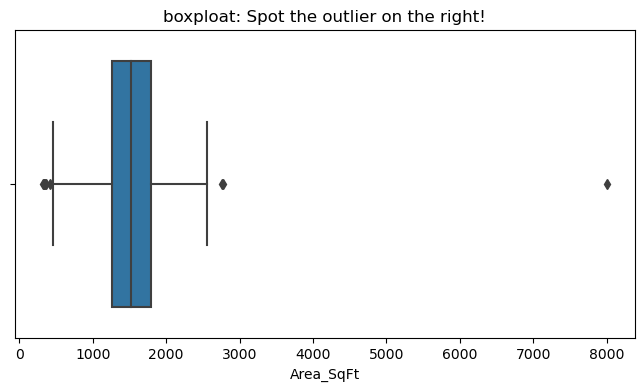

In [13]:
from scipy import stats
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Area_SqFt'])
plt.title("boxploat: Spot the outlier on the right!")
plt.show()

In [16]:
z_scores = stats.zscore(df['Area_SqFt'])
outliers_z = df[abs(z_scores)>3]
print(f"Number of Outlier detected by Z-Score: {len(outliers_z)}")

Number of Outlier detected by Z-Score: 1


In [20]:
Q1 = df['Area_SqFt'].quantile(0.25)
Q3 = df['Area_SqFt'].quantile(0.75)
IQR =Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
df_clean = df[(df['Area_SqFt'] >= lower_limit) & (df['Area_SqFt'] <= upper_limit)]
print(f"Rows before IQR cleaning: {len(df)}")
print(f"Rows after IQR cleaning: {len(df_clean)}")

Rows before IQR cleaning: 1012
Rows after IQR cleaning: 1003


In [21]:
df = df_clean.copy()

In [24]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
df['Condition_Encoded']= le.fit_transform(df['Condition'])
print("Label Encoded Condition (First(5):", df['Condition_Encoded'].head().values)

Label Encoded Condition (First(5): [1 0 3 1 0]


In [25]:
df['Condition'].head()

0    Excellent
1      Average
2         Poor
3    Excellent
4      Average
Name: Condition, dtype: object

In [26]:
df['Condition_Encoded'].head()

0    1
1    0
2    3
3    1
4    0
Name: Condition_Encoded, dtype: int32

In [27]:
le= LabelEncoder()
df['Condition_Encoded']=le.fit_transform(df['Condition'])
print("Label Encoded Condition (first 5):",df['Condition_Encoded'].head().values)


Label Encoded Condition (first 5): [1 0 3 1 0]


In [28]:
df=pd.get_dummies(df,columns=['Location'],drop_first=True)
print("Columns after One-Hot :",df.columns)

Columns after One-Hot : Index(['Transaction_ID', 'Date_Sold', 'Price', 'Area_SqFt', 'Lot_Frontage',
       'Bedrooms', 'Condition', 'Neighborhood', 'Year_Built',
       'Condition_Encoded', 'Location_Suburban', 'Location_Urban'],
      dtype='object')


In [29]:
neighborhood_means=df.groupby('Neighborhood')['Price'].mean()
df['Neighborhood_Encoded']=df['Neighborhood'].map(neighborhood_means)
print(df[['Neighborhood','Neighborhood_Encoded']].head())

  Neighborhood  Neighborhood_Encoded
0            A         190876.159217
1            D         183401.461177
2            A         190876.159217
3            C         184619.279987
4            A         190876.159217


In [30]:
df.head()

,Transaction_ID,Date_Sold,Price,Area_SqFt,Lot_Frontage,Bedrooms,Condition,Neighborhood,Year_Built,Condition_Encoded,Location_Suburban,Location_Urban,Neighborhood_Encoded
0,TXN-0,23-07-2022,208638.230487,2059.742175,56.496435,4.0,Excellent,A,1988,1,1,0,190876.159217
1,TXN-1,31-01-2023,151883.316346,1869.853473,67.109627,4.0,Average,D,1976,0,0,1,183401.461177
2,TXN-2,28-01-2023,224997.432284,1523.852148,54.151602,2.0,Poor,A,2023,3,0,1,190876.159217
3,TXN-3,12-02-2022,348542.317098,1241.225289,63.840769,4.0,Excellent,C,2012,1,0,1,184619.279987
4,TXN-4,04-07-2023,144773.149866,1779.289325,32.127707,1.0,Average,A,2017,0,0,1,190876.159217


In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
print(f"Skewness before Log: {df['Price'].skew()}")
df['Price_Log'] = np.log1p(df['Price'])
print(f"Skewness after Log: {df['Price'].skew()}")

Skewness before Log: 2.1339224525921714
Skewness after Log: 2.1339224525921714


In [40]:
scaler_std = StandardScaler()
df['Area_Standardized'] = scaler_std.fit_transform(df[['Area_SqFt']])
scaler_mm = MinMaxScaler()
df['Area_Normalized'] = scaler_std.fit_transform(df[['Area_SqFt']])
print(df[['Area_SqFt', 'Area_Standardized', 'Area_Normalized' ]].head())

     Area_SqFt  Area_Standardized  Area_Normalized
0  2059.742175           1.362738         1.362738
1  1869.853473           0.870634         0.870634
2  1523.852148          -0.026042        -0.026042
3  1241.225289          -0.758481        -0.758481
4  1779.289325           0.635933         0.635933


In [41]:
prices = np.array([100_000,200_000,500_000,200_000])
print(np.log1p(prices))

[11.51293546 12.20607765 13.12236538 12.20607765]


In [49]:
from sklearn.preprocessing import PolynomialFeatures
df['Date_Sold'] = pd.to_datetime(df['Date_Sold'], format='%d-%m-%Y')
df['House_Age'] = 2026 - df['Year_Built']

In [50]:
df['Age_Group']= pd.cut(df['House_Age'],
                       bins=[0,20,50,100],
                       labels=['New','Middle-Aged','Historic'])

In [51]:
df['Age_Group'].head()

0    Middle-Aged
1    Middle-Aged
2            New
3            New
4            New
Name: Age-Group, dtype: category
Categories (3, object): ['New' < 'Middle-Aged' < 'Historic']

In [53]:
df['House_Age'].head()

0    38
1    50
2     3
3    14
4     9
Name: House_Age, dtype: int64

In [54]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly.fit_transform(df[['Area_SqFt','Lot_Frontage']])
print("Polynomial Feature Shape:",poly_features.shape)

Polynomial Feature Shape: (1003, 5)


In [55]:
df.shape

(1003, 18)

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

x = df.select_dtypes(include=[np.number])
x=x.drop(['Price','Price_Log'],axis=1)
y = df['Price_Log']

In [60]:
model= LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(x,y)

In [61]:
selected_features = x.columns[rfe.support_]
print("Yop 5 features selected by RFE")
print(selected_features)

Yop 5 features selected by RFE
Index(['Bedrooms', 'Year_Built', 'Condition_Encoded', 'Location_Suburban',
       'House_Age'],
      dtype='object')


In [64]:
not_selected_features = x.columns[~rfe.support_]
print("not selected ny RFE")
print(not_selected_features)

not selected ny RFE
Index(['Area_SqFt', 'Lot_Frontage', 'Location_Urban', 'Neighborhood_Encoded',
       'Area_Standardized', 'Area_Normalized'],
      dtype='object')


In [5]:
#DAY 2

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
df = pd.read_csv('future_homes_v2.csv')
x = df.drop('Price',axis=1)
y = df['Price']